### 矢量数据编辑（属性表编辑）与可视化


### vector reading

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [62]:
path_data = 'data/data-section-3/kunming_district_gpd.gpkg'


In [63]:
kunming_gpd = gpd.read_file(path_data)


In [64]:
kunming_gpd.head()


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,西山区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,东川区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.8034 26.30291, 102.80537 2..."


In [65]:
### 修改属性表
kunming_gpd['dt_name']=['wuhua', 'panlong', 'guandu', 'xishan', 'dongchuan', \
                'chenggong', 'jinning', 'fumin', 'yiliang', 'shilin', \
                  'sonming', 'luquan', 'xundian', 'anning']
kunming_gpd.head()

,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ..."
1,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,guandu,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,xishan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,dongchuan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.8034 26.30291, 102.80537 2..."


In [ ]:
## 计算面积
area_district = kunming_gpd.area
print(area_district)


0     0.034791
1     0.077424
2     0.057091
3     0.079255
4     0.168411
5     0.044592
6     0.119249
7     0.089100
8     0.171084
9     0.150078
10    0.074254
11    0.380659
12    0.323476
13    0.116103
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_18152\3153942463.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_district = kunming_gpd.area


In [69]:
### 坐标系转换，后续会细讲
kunming_utm48_gpd = kunming_gpd.to_crs(32648)
kunming_utm48_gpd.crs


<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
area = kunming_utm48_gpd.area/1000000
# print(area)
kunming_utm48_gpd['area(km2)'] = area
kunming_utm48_gpd.head()


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2)
0,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269466.597 2782018.804, 269686...",388.681330
1,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269635.126 2771844.039, 269631...",864.295297
2,530111,guandu,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269663.017 2770589.114, 269738...",638.333617
3,530112,xishan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((248122.204 2751771.711, 248084...",887.075812
4,530113,dongchuan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((280703.071 2911092.909, 280900...",1866.117588


In [71]:
kunming_utm48_gpd.centroid
kunming_utm48_gpd['centroid'] = kunming_utm48_gpd.centroid
kunming_utm48_gpd.head()


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2),centroid
0,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269466.597 2782018.804, 269686...",388.681330,POINT (264056.82 2787983.365)
1,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269635.126 2771844.039, 269631...",864.295297,POINT (280956.817 2796083.348)
2,530111,guandu,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269663.017 2770589.114, 269738...",638.333617,POINT (286733.769 2773058.814)
3,530112,xishan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((248122.204 2751771.711, 248084...",887.075812,POINT (253383.598 2764249.083)
4,530113,dongchuan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((280703.071 2911092.909, 280900...",1866.117588,POINT (307239.986 2891912.392)


可视化

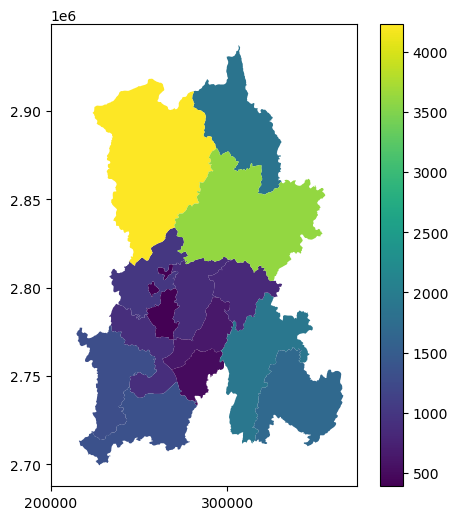

In [ ]:
## 可视化
# ax = gpd_utm48.plot(legend=True, figsize=(6,6))
ax = kunming_utm48_gpd.plot('area(km2)', legend=True, figsize=(6,6))
ax.set_xticks([200000, 300000]);


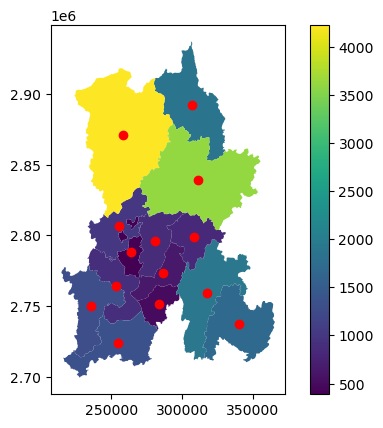

In [73]:
ax = kunming_utm48_gpd.plot("area(km2)", legend=True)
ax = kunming_utm48_gpd['centroid'].plot(color='red', ax=ax)


In [74]:
### 删除字段
kunming_utm48_gpd = kunming_utm48_gpd.drop('centroid', axis=1)
kunming_utm48_gpd.head()


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry,area(km2)
0,530102,wuhua,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269466.597 2782018.804, 269686...",388.681330
1,530103,panlong,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269635.126 2771844.039, 269631...",864.295297
2,530111,guandu,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((269663.017 2770589.114, 269738...",638.333617
3,530112,xishan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((248122.204 2751771.711, 248084...",887.075812
4,530113,dongchuan,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((280703.071 2911092.909, 280900...",1866.117588


#### 利用geopandas创建矢量文件
创建同学信息矢量数据，包含同学家乡所在地位置几何信息，以及学生姓名、性别属性信息

In [77]:
from shapely.geometry import Point  ## 第六章节细讲

student_attr = {'name': ['zhang3', 'li4', 'wang5'], 'gender': ['male', 'female', 'male']}
student_loc = [Point(102.9, 25.64), Point(102.5, 25.86),  Point(102.6, 24.63)]
student_gpd = gpd.GeoDataFrame(data=student_attr,  geometry=student_loc, crs='EPSG:4326')
student_gpd.head()
# student_gpd.plot()


,name,gender,geometry
0,zhang3,male,POINT (102.9 25.64)
1,li4,female,POINT (102.5 25.86)
2,wang5,male,POINT (102.6 24.63)


C:\Users\HP\AppData\Local\Temp\ipykernel_18152\4236025630.py:1: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ax = kunming_gpd.plot('dt_name', color='grey', edgecolor='black', alpha=0.4)


<Axes: >

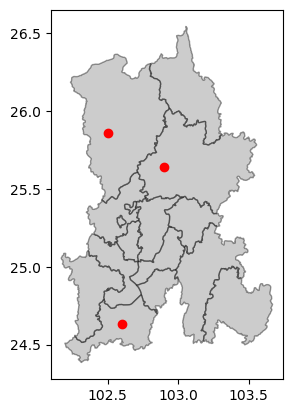

In [79]:
ax = kunming_gpd.plot('dt_name', color='grey', edgecolor='black', alpha=0.4)
student_gpd.plot(ax=ax, color='red')


将选课同学家乡信息csv表格写出为gpkg矢量数据

In [80]:
import pandas as pd
path_stud = 'students/students_2025_hometown.csv'
stud_pd = pd.read_csv(path_stud)
stud_pd.head()


,姓名,性别,家乡所在省,家乡所在市,家乡经度,家乡纬度
0,邱楚涵,女,辽宁省,大连市,121.60,38.90
1,刘莫晗,女,河北省,保定市,115.70,38.50
2,龚婉盈,女,湖北省,武汉市,113.40,29.50
3,向玲仪,女,重庆市,渝北区,106.63,29.71
4,黎浩蓉,女,云南省,曲靖市,104.25,25.67


In [81]:
stud_loc = []
lon_lat_zip = zip(stud_pd['家乡经度'].values, stud_pd['家乡纬度'].values)
for lon, lat in lon_lat_zip:
    # print((lon,lat))
    loc = Point(lon,lat)
    stud_loc.append(loc)

stud_gpd = gpd.GeoDataFrame(data=stud_pd,  geometry=stud_loc, crs='EPSG:4326')
stud_gpd

,姓名,性别,家乡所在省,家乡所在市,家乡经度,家乡纬度,geometry
0,邱楚涵,女,辽宁省,大连市,121.60,38.90,POINT (121.6 38.9)
1,刘莫晗,女,河北省,保定市,115.70,38.50,POINT (115.7 38.5)
2,龚婉盈,女,湖北省,武汉市,113.40,29.50,POINT (113.4 29.5)
3,向玲仪,女,重庆市,渝北区,106.63,29.71,POINT (106.63 29.71)
4,黎浩蓉,女,云南省,曲靖市,104.25,25.67,POINT (104.25 25.67)
5,黄玉缘,女,云南省,楚雄市,100.35,24.30,POINT (100.35 24.3)
6,曹匡杰,男,浙江省,杭州市,120.20,30.30,POINT (120.2 30.3)
7,杨媛圆,女,云南省,昆明市,102.10,26.30,POINT (102.1 26.3)
8,苏蕊,女,四川省,德阳市,104.39,31.12,POINT (104.39 31.12)
9,孙忠唤,女,贵州省,黔西南州,104.98,24.93,POINT (104.98 24.93)


#### 矢量数据写出

In [ ]:
## 数据写出
path_out = 'data/data-section-3/kunming_district_gpd_2.gpkg'
path_student = 'data/data-section-3/students_2025_hometown.gpkg'
# gpd_utm48.to_file(path_out)
stud_gpd.to_file(path_student)
